# RSI Analysis

In the orevious notebook, we identified that The RSI may have some power in predicting returns. In this notebook we will investigate this further with some statistical analysis.

## Table of Contents
1. [Introduction](#introduction)
2. [Exploring RSI and Returns](#Exploring-RSI-and-Returns)
<!-- 3. -->


In [1]:
import os
import sys

# add root directory to path for helper functions
if os.path.abspath("../") not in sys.path:
    sys.path.append(os.path.abspath("../"))

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from helper_functions.ingestion import get_price_data_and_rsi

## Introduction

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df = pd.read_html(url, header=0)[0]
tickers = df['Symbol'].tolist()

In [3]:
data = get_price_data_and_rsi(
    tickers=tickers,
    period=10,
    start_date="2020-01-01",
    end_date="2024-01-01",
    interval='1d',
    remove_zeros=True,
    logger_batch_size=100
    )


1 Failed download:
['AMTM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1704085200")')

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')

1 Failed download:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-01-01)')
2024-10-11 09:08:18.693 | INFO     | helper_functions.ingestion:get_price_data_and_rsi:45 - 100 of 503 downloaded
2024-10-11 09:08:30.647 | INFO     | helper_functions.ingestion:get_price_data_and_rsi:45 - 200 of 503 downloaded

1 Failed download:
['GEV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1704085200")')
2024-10-11 09:08:42.938 | INFO     | helper_functions.ingestion:get_price_data_and_rsi:45 - 300

In [4]:
data

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
MMM    2020-01-16  151.070236  151.505020  150.242477  151.346161  124.308533   
       2020-01-17  151.337799  152.299332  151.086960  151.630432  124.542038   
       2020-01-21  152.048492  152.098663  149.356186  149.991638  123.196045   
       2020-01-22  150.091980  150.978256  148.729095  148.854507  122.262032   
       2020-01-23  148.051834  149.197327  147.483276  148.612045  122.062889   
...                       ...         ...         ...         ...         ...   
ZTS    2023-12-22  195.320007  195.910004  192.740005  194.979996  193.525330   
       2023-12-26  194.880005  196.339996  194.089996  195.500000  194.041458   
       2023-12-27  195.410004  197.009995  194.740005  196.899994  195.431000   
       2023-12-28  197.619995  198.600006  196.529999  197.160004  195.689072   
       2023-12-29  196.679993  198.009995  196.250000  197.369995  195.897491   

                      Volume    Return        rsi  
Ticker Date                                        
MMM    2020-01-16  2571280.0  0.006842  54.955836  
       2020-01-17  4413360.0  0.001878  56.566023  
       2020-01-21  4027769.0 -0.010808  46.027019  
       2020-01-22  2894559.0 -0.007581  40.245933  
       2020-01-23  2820646.0 -0.001629  39.082946  
...                      ...       ...        ...  
ZTS    2023-12-22  1548400.0  0.001644  65.435833  
       2023-12-26   814600.0  0.002667  66.391233  
       2023-12-27   766400.0  0.007161  68.957994  
       2023-12-28   880100.0  0.001321  69.439624  
       2023-12-29  1007200.0  0.001065  69.859272  

[491434 rows x 8 columns]

## Exploring RSI and Returns

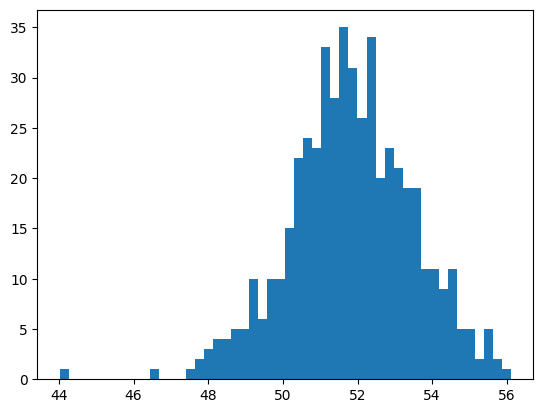

In [16]:
plt.hist(data['rsi'], bins=50)
plt.show()

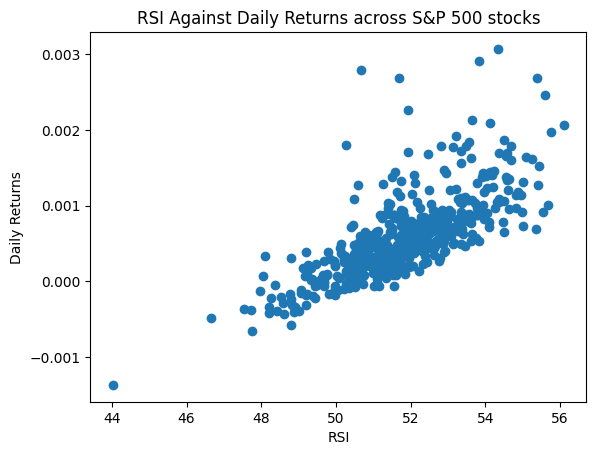

In [17]:
plt.scatter(data['rsi'], data_grouped['Return'])
plt.xlabel("RSI")
plt.ylabel("Daily Returns")
plt.title("RSI Against Daily Returns across S&P 500 stocks")
plt.show()